In [168]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import torch
import numpy as np

In [169]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Appliances.json.gz

--2023-12-08 01:26:30--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Appliances.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59884788 (57M) [application/x-gzip]
Saving to: ‘meta_Appliances.json.gz.1’

meta_Appliances.jso 100%[===================>]  57.11M  87.8MB/s    in 0.7s    

2023-12-08 01:26:31 (87.8 MB/s) - ‘meta_Appliances.json.gz.1’ saved [59884788/59884788]



In [170]:
def open_to_df(file):
  data = []
  with gzip.open(file) as f:
      for l in f:
          data.append(json.loads(l.strip()))

  df = pd.DataFrame.from_dict(data)
  return df

In [171]:
metadata = open_to_df('meta_Appliances.json.gz')
metadata.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[],,Tupperware Freezer Square Round Container Set ...,[],,Tupperware,[Each 3-pc. set includes two 7/8-cup/200 mL an...,"[>#39,745 in Appliances (See top 100)]",[],{},Appliances,,"November 19, 2008",,7301113188,[],[]
1,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[2 X Tupperware Pure & Fresh Unique Covered Co...,,2 X Tupperware Pure &amp; Fresh Unique Covered...,[],,Tupperware,[2 X Tupperware Pure & Fresh Unique Covered Co...,"[>#6,118 in Appliances (See top 100)]",[B004RUGHJW],{},Appliances,,"June 5, 2016",$3.62,7861850250,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,"[Appliances, Parts &amp; Accessories]",,[],,The Cigar - Moments of Pleasure,[],,The Cigar Book,[],"[>#1,861,816 in Home &amp; Kitchen (See Top 10...","[B01HCAVSLK, 1632206579]",{},Amazon Home,,,$150.26,8792559360,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,"[Appliances, Parts & Accessories]","class=""a-keyvalue prodDetTable"" role=""present...","[Multi purpost descaler, especially suited to ...",,Caraselle 2X 50G Appliance Descalene,[],,Caraselle,[],"[>#1,654,505 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"December 17, 2014",.a-box-inner{background-color:#fff}#alohaBuyBo...,9792954481,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Full gauge and size beveled-edge; furnished w...,,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,[],,EATON Wiring,[Returns will not be honored on this closeout ...,"[>#3,066,990 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"January 16, 2007",$3.43,B00002N5EL,[],[]


In [172]:
# metadata.to_csv('metadata.csv',escapechar='\\')

In [173]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Appliances.json.gz

--2023-12-08 01:26:39--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Appliances.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69677301 (66M) [application/x-gzip]
Saving to: ‘Appliances.json.gz.1’

Appliances.json.gz. 100%[===================>]  66.45M  94.4MB/s    in 0.7s    

2023-12-08 01:26:39 (94.4 MB/s) - ‘Appliances.json.gz.1’ saved [69677301/69677301]



In [174]:
userrating = open_to_df('Appliances.json.gz')
userrating.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN
1,5.0,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN
2,5.0,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200,NaN
3,5.0,NaN,False,"10 9, 2013",A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,1381276800,NaN
4,5.0,10,False,"09 7, 2013",A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,NaN


In [175]:
# userrating.to_csv('userrating.csv')

In [176]:
userrating.describe()

,overall,unixReviewTime
count,602777.000000,6.027770e+05
mean,4.274209,1.455049e+09
std,1.301597,5.481787e+07
min,1.000000,9.722592e+08
25%,4.000000,1.423613e+09
50%,5.000000,1.464134e+09
75%,5.000000,1.496016e+09
max,5.000000,1.538611e+09


In [177]:
select_item_col = ['asin','title','brand']
itemdata = metadata[select_item_col].copy()
itemdata.head()

,asin,title,brand
0,7301113188,Tupperware Freezer Square Round Container Set ...,Tupperware
1,7861850250,2 X Tupperware Pure &amp; Fresh Unique Covered...,Tupperware
2,8792559360,The Cigar - Moments of Pleasure,The Cigar Book
3,9792954481,Caraselle 2X 50G Appliance Descalene,Caraselle
4,B00002N5EL,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,EATON Wiring


In [178]:
select_userreview_col = ['reviewerID', 'asin', 'overall', 'unixReviewTime']
userdata = userrating[select_userreview_col].copy()
userdata.head()

,reviewerID,asin,overall,unixReviewTime
0,A3NHUQ33CFH3VM,1118461304,5.0,1385510400
1,A3SK6VNBQDNBJE,1118461304,5.0,1383264000
2,A3SOFHUR27FO3K,1118461304,5.0,1381363200
3,A1HOG1PYCAE157,1118461304,5.0,1381276800
4,A26JGAM6GZMM4V,1118461304,5.0,1378512000


In [179]:
cdata = pd.merge(userdata, itemdata, on='asin', how='inner')
cdata.head(2)

,reviewerID,asin,overall,unixReviewTime,title,brand
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
1,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton


In [180]:
cdata['overall'].unique()

array([5., 4., 3., 1., 2.])

In [181]:
cdata['reviewerID'].describe()

count            615747
unique           514945
top       A8WEXFRWX1ZHH
freq                208
Name: reviewerID, dtype: object

In [182]:
total_user_id = len(cdata['reviewerID'].unique())
print(total_user_id)

514945


In [183]:
cdata.isnull().sum()

reviewerID        0
asin              0
overall           0
unixReviewTime    0
title             0
brand             0
dtype: int64

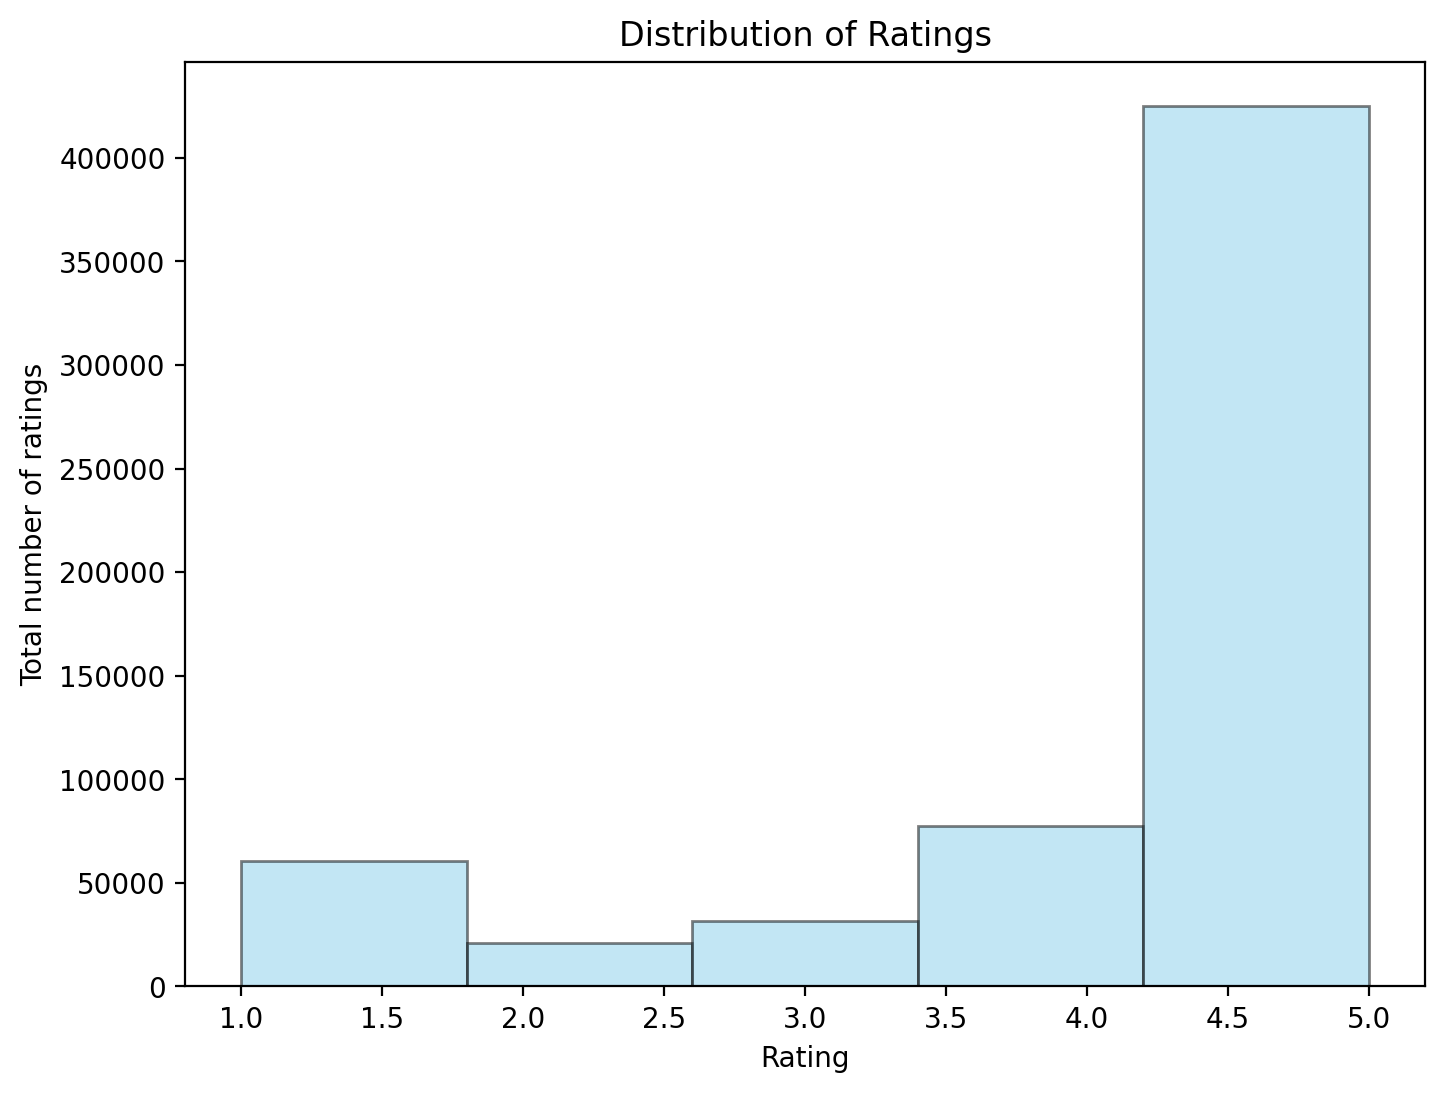

In [184]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(cdata['overall'], bins=5, alpha=0.5, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Total number of ratings')
plt.title('Distribution of Ratings')
plt.grid(False)
plt.show()

In [185]:
review_counts = cdata.groupby('reviewerID')['overall'].count().sort_values(ascending=False)
review_counts.describe()

count    514945.000000
mean          1.195753
std           1.089122
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         208.000000
Name: overall, dtype: float64

In [186]:
sum(review_counts>=5)

1856

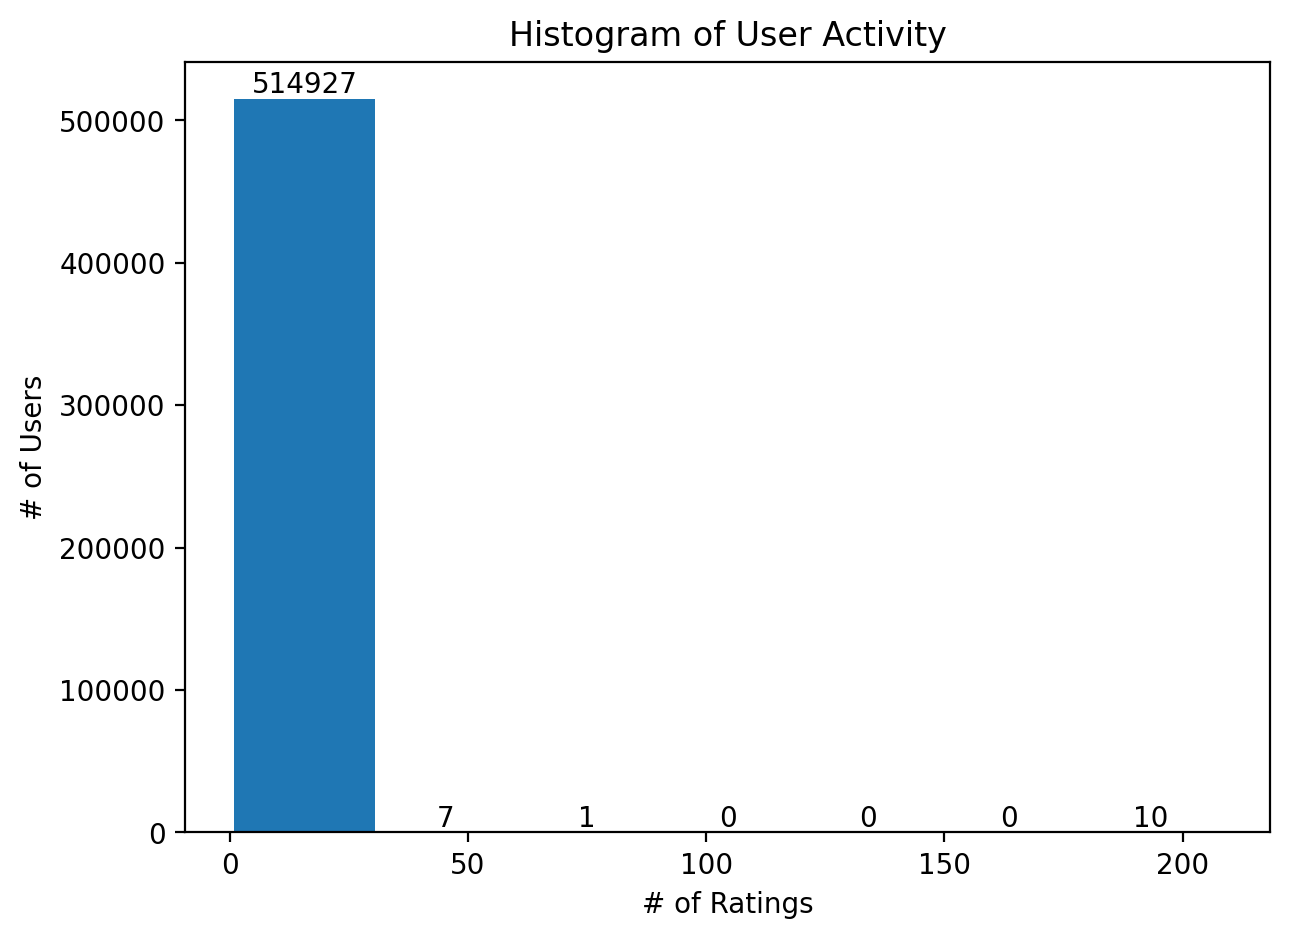

In [187]:
plt.figure(figsize=(7,5))
_, _, bars = plt.hist(review_counts, bins=7)
plt.bar_label(bars)
plt.title('Histogram of User Activity')
plt.xlabel('# of Ratings')
plt.ylabel('# of Users')
plt.show()

In [188]:
average_ratings = cdata.groupby(["title"])["overall"].mean()
average_ratings.nlargest(5)

title
 316407400 Frigidaire Range Glide                      5.0
 3348552 Whirlpool Washer Hose, Pump To Drain          5.0
 3957749 DRYER KNOB WHIRLPOOL ROPER USED PART fc       5.0
 53709-28 Maytag Refrigerator Hinge Upper Dr           5.0
 8544935 WASHER CONTROL KNOB WHIRLPOOL USED PART fc    5.0
Name: overall, dtype: float64

In [189]:
cdata.head(3)

,reviewerID,asin,overall,unixReviewTime,title,brand
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
1,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
2,A3TIWHNJXMSIU7,B00002N7IL,5.0,1522022400,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton


In [190]:
itemnum_2_itemid = list(cdata['asin'].unique())
itemnum_2_itemid.sort()
itemid_2_itemnum = {c:i for i,c in enumerate(itemnum_2_itemid)}
cdata['asin_id'] = cdata['asin'].apply(lambda x: itemid_2_itemnum[x])

In [191]:
cdata.head(2)

,reviewerID,asin,overall,unixReviewTime,title,brand,asin_id
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6
1,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6


In [192]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cdata['reviewerID'] = label_encoder.fit_transform(cdata['reviewerID'])

cdata.head(2)

,reviewerID,asin,overall,unixReviewTime,title,brand,asin_id
0,379227,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6
1,379227,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6


In [193]:
def check_ratings_num(df):
    item_num = set(df['asin_id'])
    if item_num == set(range(len(item_num))):
        return True
    else:
        return False

In [194]:
check_ratings_num(cdata)

True

In [195]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [196]:
def df_2_tensor(df, device):
    user_num = np.asarray(df['reviewerID'])
    item_num = np.asarray(df['asin_id'])
    rating = np.asarray(df['overall'])
    return torch.from_numpy(user_num).to(device), torch.from_numpy(item_num).to(device), torch.from_numpy(rating).to(device)

In [197]:
from sklearn.model_selection import train_test_split

ratings_trainval, ratings_test = train_test_split(cdata, test_size=0.1, random_state=42)
ratings_train, ratings_val = train_test_split(ratings_trainval, test_size=0.1, random_state=42)

In [198]:
train_user_num, train_item_num, train_rating = df_2_tensor(ratings_train,device)

In [199]:
val_user_num, val_item_num, val_rating = df_2_tensor(ratings_val,device)
test_user_num, test_item_num, test_rating = df_2_tensor(ratings_test,device)

In [200]:
def tensor_2_dataset(user,item,rating):
    return list(zip(user,item,rating))

def make_dataloader(dataset,bs,shuffle):
    return torch.utils.data.DataLoader(dataset,batch_size=bs,shuffle=shuffle)

In [201]:
train_dataset = tensor_2_dataset(train_user_num,train_item_num, train_rating)
val_dataset = tensor_2_dataset(val_user_num,val_item_num,val_rating)
test_dataset = tensor_2_dataset(test_user_num, test_item_num, test_rating)

In [202]:
train_dataloader = make_dataloader(train_dataset,1024,True)
val_dataloader = make_dataloader(val_dataset,1024, False)
test_dataloader = make_dataloader(test_dataset,1024,False)

In [203]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [204]:
class ScaledEmbedding(nn.Embedding):
    def reset_parameters(self):
        self.weight.data.normal_(0, 1.0 / self.embedding_dim)
        if self.padding_idx is not None:
            self.weight.data[self.padding_idx].fill_(0.0)


class ZeroEmbedding(nn.Embedding):
    def reset_parameters(self):
        self.weight.data.zero_()
        if self.padding_idx is not None:
            self.weight.data[self.padding_idx].fill_(0.0)

In [205]:
class DotModel(nn.Module):

    def __init__(self,
                 num_users,
                 num_items,
                 embedding_dim=32):

        super(DotModel, self).__init__()

        self.embedding_dim = embedding_dim
        self.user_embeddings = ScaledEmbedding(num_users, embedding_dim)
        self.item_embeddings = ScaledEmbedding(num_items, embedding_dim)
        self.user_biases = ZeroEmbedding(num_users, 1)
        self.item_biases = ZeroEmbedding(num_items, 1)


    def forward(self, user_ids, item_ids):
        user_embedding = self.user_embeddings(user_ids)
        item_embedding = self.item_embeddings(item_ids)

        user_bias = self.user_biases(user_ids).squeeze()
        item_bias = self.item_biases(item_ids).squeeze()

        dot = torch.mul(user_embedding, item_embedding).sum(1)
        res = dot + user_bias + item_bias

        return res

In [206]:
total_user_id = len(cdata['reviewerID'].unique())
total_item_id = len(cdata['asin'].unique())
net = DotModel(total_user_id,total_item_id).to(device)

In [207]:
net

DotModel(
  (user_embeddings): ScaledEmbedding(514945, 32)
  (item_embeddings): ScaledEmbedding(30238, 32)
  (user_biases): ZeroEmbedding(514945, 1)
  (item_biases): ZeroEmbedding(30238, 1)
)

In [208]:
batch_user, batch_item, batch_rating = next(iter(train_dataloader))
batch_user, batch_item, batch_rating = batch_user.to(device), batch_item.to(device), batch_rating.to(device)

In [209]:
predictions = net(batch_user, batch_item)
predictions.shape

torch.Size([1024])

In [210]:
def regression_loss(predicted_ratings, observed_ratings):
    return ((observed_ratings - predicted_ratings) ** 2).mean()

In [211]:
loss=regression_loss(predictions,batch_rating)

In [212]:
loss

tensor(20.0618, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)

In [213]:
class FactorizationModel(object):

    def __init__(self, embedding_dim=32, n_iter=10, l2=0.0,
                 learning_rate=1e-2, device=device, net=None, num_users=None,
                 num_items=None,random_state=None):

        self._embedding_dim = embedding_dim
        self._n_iter = n_iter
        self._learning_rate = learning_rate
        self._l2 = l2
        self._device = device
        self._num_users = num_users
        self._num_items = num_items
        self._net = net
        self._optimizer = None
        self._loss_func = None
        self._random_state = random_state or np.random.RandomState()


    def _initialize(self):
        if self._net is None:
            self._net = DotModel(self._num_users, self._num_items, self._embedding_dim).to(self._device)

        self._optimizer = optim.Adam(
                self._net.parameters(),
                lr=self._learning_rate,
                weight_decay=self._l2
            )

        self._loss_func = regression_loss

    @property
    def _initialized(self):
        return self._optimizer is not None


    def fit(self, dataloader, val_dataloader, verbose=True):
        if not self._initialized:
            self._initialize()

        valid_loss_min = np.Inf
        train_losses, valid_losses, valid_maes =[], [], []

        for epoch_num in range(self._n_iter):
            tot_train_loss = 0.0
            self._net.train()
            for batch_user, batch_item, batch_rating in dataloader:

                bath_user=batch_user.to(device)
                batch_item=batch_item.to(device)
                batch_rating=batch_rating.to(device)

                #1. Compute the output
                predictions = self._net(batch_user,batch_item)
                #2. Compute the loss
                #loss = self._loss_func(predictions,batch_rating)
                loss = self._loss_func(predictions,batch_rating)
                # 3. Zero out the gradient
                self._optimizer.zero_grad()
                # 4. Backward pass, compute the new gradients
                loss.backward()
                # 5. Update the weights
                self._optimizer.step()

                tot_train_loss += loss.item()


            train_loss = tot_train_loss /len(dataloader)
            # Go to the validation loop
            valid_loss, valid_mae = self.test(val_dataloader)
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)
            valid_maes.append(valid_mae)

            if verbose:
                print('Epoch {}: loss_train {}, loss_val {}'.format(epoch_num, train_loss,valid_loss))

            if np.isnan(train_loss) or train_loss == 0.0:
                raise ValueError('Degenerate train loss: {}'.format(train_loss))


            if valid_loss <= valid_loss_min:
              print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
              torch.save(self._net.state_dict(), 'model_cf.pt')
              valid_loss_min = valid_loss

        return train_losses, valid_losses, valid_maes


    def test(self,dataloader, verbose = False):
        self._net.eval()
        L1loss = torch.nn.L1Loss()
        tot_test_loss = 0.0
        tot_test_mae = 0.0


        with torch.no_grad():
          for batch_user, batch_item, batch_rating in dataloader:
            #1. compute the output
            predictions = self._net(batch_user,batch_item)
            #2. Compute the loss
            loss = self._loss_func(predictions,batch_rating)

            tot_test_loss += loss.item()
            tot_test_mae += L1loss(predictions,batch_rating.type(torch.FloatTensor).to(device))


        test_loss = tot_test_loss / len(dataloader)
        test_mae = tot_test_mae / len(dataloader)
        if verbose:
            print(f"RMSE: {np.sqrt(test_loss)}, MAE: {test_mae}")
        return test_loss, test_mae

In [216]:
model = FactorizationModel(embedding_dim=32,  # latent dimensionality
                                   n_iter=10,  # number of epochs of training
                                   learning_rate=0.001,
                                   l2=1e-8,  # strength of L2 regularization
                                   num_users=total_user_id,
                                   num_items=total_item_id)

In [217]:
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)

Epoch 0: loss_train 18.94044145787278, loss_val 17.94844920673904
Validation loss decreased (inf --> 17.948449).  Saving model ...
Epoch 1: loss_train 16.500958791432062, loss_val 16.01498574545468
Validation loss decreased (17.948449 --> 16.014986).  Saving model ...
Epoch 2: loss_train 12.821913295339822, loss_val 14.301833812580071
Validation loss decreased (16.014986 --> 14.301834).  Saving model ...
Epoch 3: loss_train 8.495609732139249, loss_val 13.145928995211696
Validation loss decreased (14.301834 --> 13.145929).  Saving model ...
Epoch 4: loss_train 5.125277705571805, loss_val 12.47801603308823
Validation loss decreased (13.145929 --> 12.478016).  Saving model ...
Epoch 5: loss_train 3.1204499646852524, loss_val 12.120685350798896
Validation loss decreased (12.478016 --> 12.120685).  Saving model ...
Epoch 6: loss_train 1.9772750849986287, loss_val 11.908081013215135
Validation loss decreased (12.120685 --> 11.908081).  Saving model ...
Epoch 7: loss_train 1.2978080042792766,

In [218]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

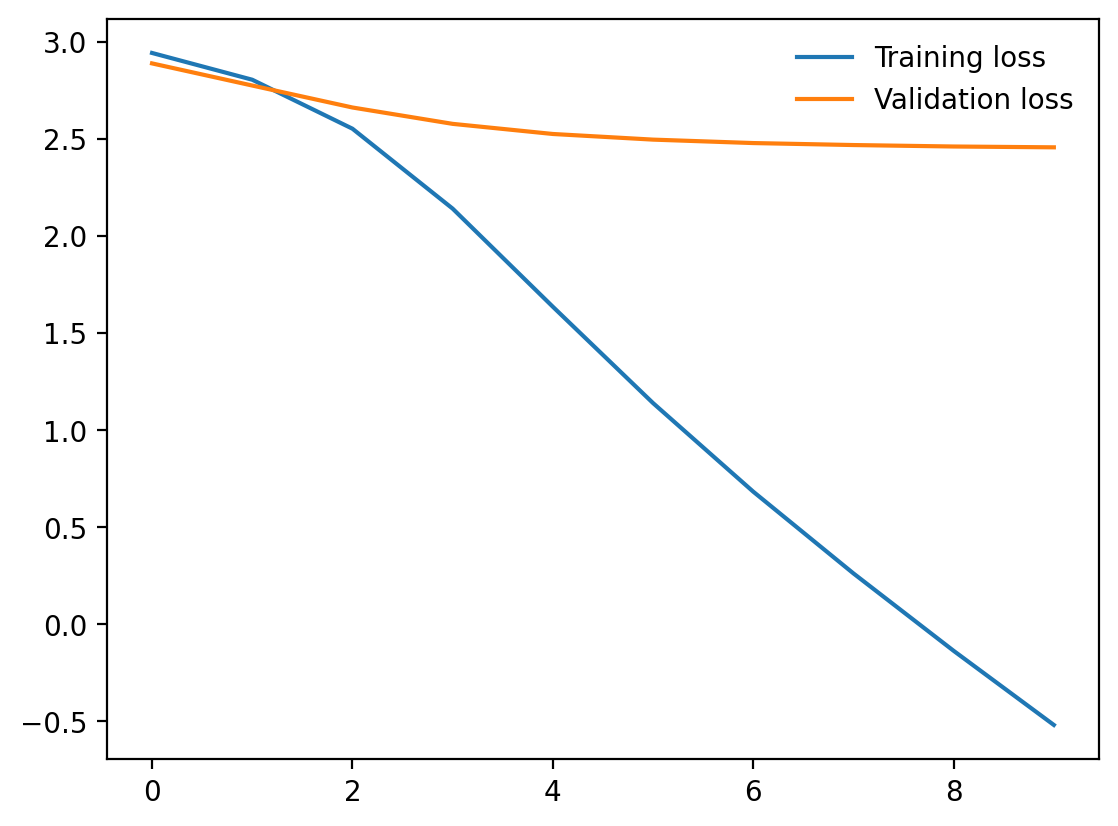

In [219]:
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)

In [220]:
model._net.load_state_dict(torch.load('model_cf.pt'))

<All keys matched successfully>

In [221]:
test_loss, test_mae = model.test(test_dataloader,True)

RMSE: 3.4082271297226865, MAE: 3.0566940307617188


Epoch 0: loss_train 18.94111875379776, loss_val 17.94798753635856
Validation loss decreased (inf --> 17.947988).  Saving model ...
Epoch 1: loss_train 16.507119208291503, loss_val 16.01209337440349
Validation loss decreased (17.947988 --> 16.012093).  Saving model ...
Epoch 2: loss_train 12.827464297180024, loss_val 14.3005131281843
Validation loss decreased (16.012093 --> 14.300513).  Saving model ...
Epoch 3: loss_train 8.50052070475018, loss_val 13.145305290886391
Validation loss decreased (14.300513 --> 13.145305).  Saving model ...
Epoch 4: loss_train 5.127638262196532, loss_val 12.47884824010907
Validation loss decreased (13.145305 --> 12.478848).  Saving model ...
Epoch 5: loss_train 3.1167855377194713, loss_val 12.122942047030623
Validation loss decreased (12.478848 --> 12.122942).  Saving model ...
Epoch 6: loss_train 1.9763503392247714, loss_val 11.913082912401089
Validation loss decreased (12.122942 --> 11.913083).  Saving model ...
Epoch 7: loss_train 1.2942832909364133, lo

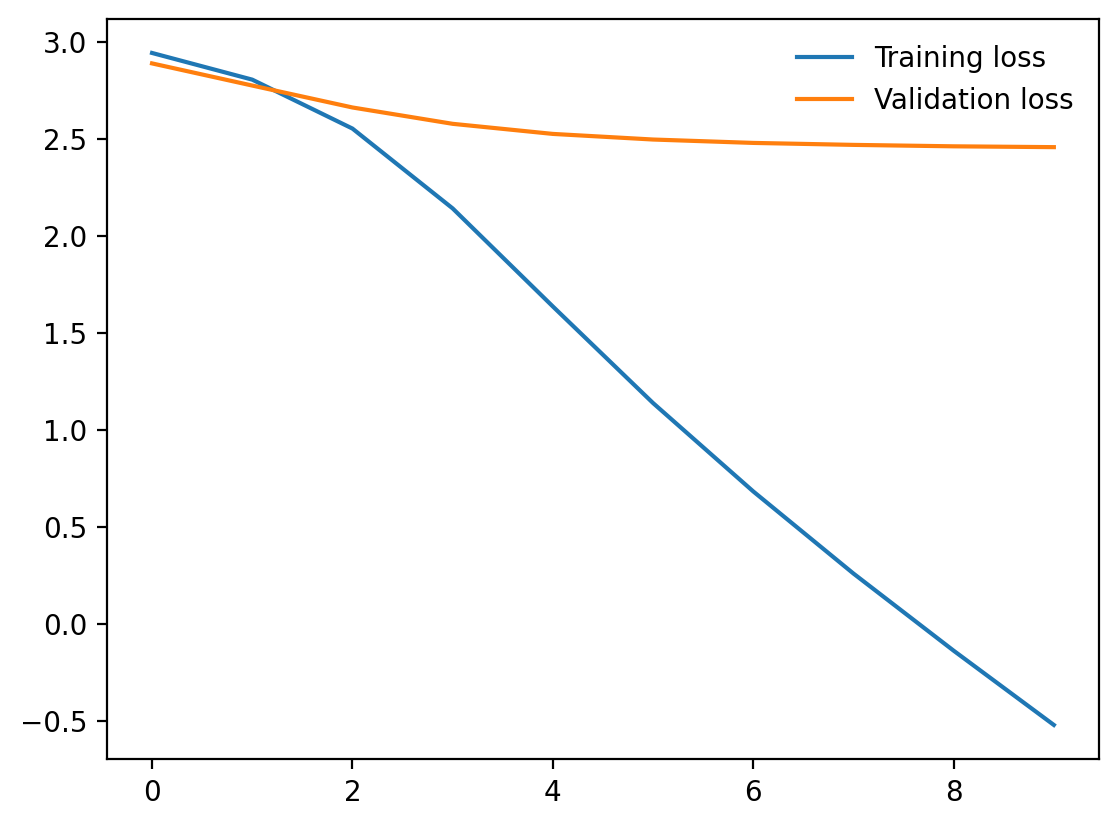

In [222]:
model = FactorizationModel(embedding_dim=32,
                                   n_iter=10,
                                   learning_rate=0.001,
                                   l2=1e-8,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

In [223]:
cdata.head()

,reviewerID,asin,overall,unixReviewTime,title,brand,asin_id
0,379227,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6
1,379227,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6
2,383126,B00002N7IL,5.0,1522022400,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6
3,383126,B00002N7IL,5.0,1522022400,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6
4,498498,B00002N7IL,5.0,1521504000,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6


In [224]:
numitem_2_name = {i:name for name,i in np.asarray(cdata[['title', 'asin_id']])}
name_2_numitem = {name:i for name,i in np.asarray(cdata[['title', 'asin_id']])}

In [225]:
my_rating = {}

for x, y, z in test_dataset:  # reviewerID, asin, rating
    x = int(x)
    z = int(z)
    if x not in my_rating:
        my_rating[x] = []
    my_rating[x].append(z)

print(my_rating)

{362019: [4], 243032: [5], 291762: [5, 1], 49199: [1], 196356: [1], 37302: [1], 13569: [5], 404: [5], 107376: [2, 2], 125185: [5], 390560: [5], 156532: [5], 281243: [5], 208137: [5], 23102: [5], 272993: [5], 69788: [5], 374673: [5], 306355: [4], 266749: [5], 253723: [4], 36107: [5], 365940: [1], 342739: [4], 276925: [1], 303575: [3], 354746: [3], 346590: [3], 327581: [5], 16384: [4], 477037: [5], 176177: [5], 476022: [5], 142760: [5], 195650: [5], 326138: [5], 512718: [2], 125394: [5, 5], 160433: [5], 445991: [5], 262498: [5], 270691: [5], 441550: [5], 67079: [5], 264146: [5], 403449: [5], 419809: [5], 222603: [5], 88987: [5], 112685: [1], 278477: [5], 182907: [1], 39119: [5], 325115: [5], 384611: [5], 290367: [4], 432079: [5], 169659: [2], 34510: [3], 170921: [2], 480319: [5], 291778: [2], 55332: [5], 441269: [1], 493447: [5], 315194: [2], 76649: [4], 192704: [5], 275087: [4], 157723: [5], 353454: [4], 334879: [5], 473141: [5], 357650: [5], 447016: [5], 154291: [1], 138829: [5], 28968

In [226]:
modified_ratings = {}
for reviewer_id, ratings_list in my_rating.items():
    if len(ratings_list) > 0:
        modified_ratings[reviewer_id] = ratings_list[0]

print(modified_ratings)
my_rating = modified_ratings
print(len(my_rating))

{362019: 4, 243032: 5, 291762: 5, 49199: 1, 196356: 1, 37302: 1, 13569: 5, 404: 5, 107376: 2, 125185: 5, 390560: 5, 156532: 5, 281243: 5, 208137: 5, 23102: 5, 272993: 5, 69788: 5, 374673: 5, 306355: 4, 266749: 5, 253723: 4, 36107: 5, 365940: 1, 342739: 4, 276925: 1, 303575: 3, 354746: 3, 346590: 3, 327581: 5, 16384: 4, 477037: 5, 176177: 5, 476022: 5, 142760: 5, 195650: 5, 326138: 5, 512718: 2, 125394: 5, 160433: 5, 445991: 5, 262498: 5, 270691: 5, 441550: 5, 67079: 5, 264146: 5, 403449: 5, 419809: 5, 222603: 5, 88987: 5, 112685: 1, 278477: 5, 182907: 1, 39119: 5, 325115: 5, 384611: 5, 290367: 4, 432079: 5, 169659: 2, 34510: 3, 170921: 2, 480319: 5, 291778: 2, 55332: 5, 441269: 1, 493447: 5, 315194: 2, 76649: 4, 192704: 5, 275087: 4, 157723: 5, 353454: 4, 334879: 5, 473141: 5, 357650: 5, 447016: 5, 154291: 1, 138829: 5, 28968: 5, 340739: 5, 175915: 5, 451000: 5, 255661: 4, 367251: 5, 331439: 2, 397031: 5, 93975: 5, 504121: 1, 200313: 5, 248169: 5, 166123: 4, 335754: 5, 310761: 1, 40978

In [227]:
my_rated_items = [name for name in list(my_ratings.keys())]

In [228]:
my_ratings = {int(y): int(z) for x, y, z in test_dataset[3:53]}
print(my_ratings)

{7836: 1, 28664: 1, 11902: 1, 16237: 5, 264: 5, 22154: 2, 61: 5, 7347: 5, 4724: 5, 10545: 5, 5739: 5, 6840: 5, 26245: 5, 28187: 5, 12782: 5, 11800: 4, 6791: 5, 5364: 4, 5571: 3, 11405: 1, 553: 4, 28787: 5, 3088: 3, 379: 3, 12780: 5, 1927: 4, 12692: 5, 12226: 5, 2052: 5, 12398: 5, 18393: 5, 12786: 5, 25939: 2, 12607: 5, 980: 5, 28634: 5, 19519: 5, 6844: 5, 22489: 5, 176: 5, 21121: 5, 18664: 5, 21801: 5, 29617: 5, 4064: 1, 3929: 5, 23918: 1, 2076: 5}


In [229]:
item_emb_np = model._net.item_embeddings.weight.data.cpu().numpy()

In [230]:
len(my_rated_items)

48

In [231]:
item_emb_np.shape

(30238, 32)

In [232]:
item_emb_np[my_rated_items, :]

array([[ 1.1210382 , -1.1972691 ,  1.1935792 , ...,  1.0865766 ,
        -1.0951567 ,  1.176652  ],
       [-1.3699298 ,  1.298395  , -1.0902622 , ...,  1.2763572 ,
        -1.2842273 ,  1.2728261 ],
       [ 1.2115498 ,  0.93080586, -1.2475965 , ...,  1.225018  ,
         1.0320163 ,  1.1696168 ],
       ...,
       [-1.026262  ,  1.1980562 , -1.0997257 , ..., -1.2516268 ,
         1.3170195 , -1.1900026 ],
       [ 0.682474  ,  0.9060035 , -0.9548053 , ...,  0.81892   ,
        -0.89814985,  0.9756561 ],
       [-1.1853625 , -1.0737675 , -1.2555295 , ...,  0.82055336,
         1.2223676 , -1.1491833 ]], dtype=float32)

In [233]:
my_rated_items = [x for x in list(my_ratings.keys())]
len(my_rated_items)

48

In [234]:
len(my_ratings)

48

In [235]:
item_emb_np.shape

(30238, 32)

In [236]:
my_rated_items = [name for name in list(my_ratings.keys())]

In [237]:
item_emb_np.shape

(30238, 32)

In [238]:
cdata.sort_values(['asin_id'])

,reviewerID,asin,overall,unixReviewTime,title,brand,asin_id
553851,152716,7301113188,5.0,1236902400,Tupperware Freezer Square Round Container Set ...,Tupperware,0
551259,313589,7861850250,3.0,1484352000,2 X Tupperware Pure &amp; Fresh Unique Covered...,Tupperware,1
551260,390275,8792559360,5.0,1483056000,The Cigar - Moments of Pleasure,The Cigar Book,2
551261,414178,8792559360,5.0,1481673600,The Cigar - Moments of Pleasure,The Cigar Book,2
551262,462539,8792559360,5.0,1481673600,The Cigar - Moments of Pleasure,The Cigar Book,2
...,...,...,...,...,...,...,...
615745,473194,B01HJH92JQ,1.0,1521763200,Bosch 00175338 Switch,Bosch,30235
615746,44983,B01HJH92JQ,3.0,1515369600,Bosch 00175338 Switch,Bosch,30235
615743,209079,B01HJHHEA0,2.0,1533081600,Frigidaire 316543810 Knob,Frigidaire,30236
615744,80798,B01HJHHEA0,5.0,1523577600,Frigidaire 316543810 Knob,Frigidaire,30236


In [239]:
item_emb_np[my_rated_items, :]

array([[ 1.1210382 , -1.1972691 ,  1.1935792 , ...,  1.0865766 ,
        -1.0951567 ,  1.176652  ],
       [-1.3699298 ,  1.298395  , -1.0902622 , ...,  1.2763572 ,
        -1.2842273 ,  1.2728261 ],
       [ 1.2115498 ,  0.93080586, -1.2475965 , ...,  1.225018  ,
         1.0320163 ,  1.1696168 ],
       ...,
       [-1.026262  ,  1.1980562 , -1.0997257 , ..., -1.2516268 ,
         1.3170195 , -1.1900026 ],
       [ 0.682474  ,  0.9060035 , -0.9548053 , ...,  0.81892   ,
        -0.89814985,  0.9756561 ],
       [-1.1853625 , -1.0737675 , -1.2555295 , ...,  0.82055336,
         1.2223676 , -1.1491833 ]], dtype=float32)

In [240]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1, fit_intercept=True)
clf.fit(item_emb_np[my_rated_items, :], list(my_ratings.values()))
my_emb_np = clf.coef_
my_emb_bias = clf.intercept_

In [241]:
item_bias_np = model._net.item_biases.weight.data.cpu().numpy()
item_bias_np = item_bias_np.squeeze()

In [242]:
my_rating_results = (my_emb_np * item_emb_np).sum(1) + item_bias_np + my_emb_bias
my_results = [(numitem_2_name[item], ratings) for item, ratings in enumerate(my_rating_results)]
my_results_df = pd.DataFrame(my_results, columns = ["title", "pred_ratings"])

In [243]:
my_results_df.describe()

,pred_ratings
count,30238.000000
mean,4.196712
std,0.673426
min,0.520875
25%,3.857813
50%,4.085374
75%,4.459133
max,9.621647


In [244]:
merged_data = pd.merge(my_results_df, cdata[['title', 'asin_id']], on='title', how='left')
merged_data['actual_rating'] = merged_data['asin_id'].map(my_ratings)
merged_data.dropna(subset=['actual_rating'], inplace=True)
final_output = merged_data.copy()
merged_data.isna().sum()

title            0
pred_ratings     0
asin_id          0
actual_rating    0
dtype: int64

In [245]:
final_output.sort_values(['actual_rating']).head()

,title,pred_ratings,asin_id,actual_rating
244100,Whirlpool D7824706Q Ice Maker for Refrigerator,2.997264,7836,1.0
605742,"Waterdrop MWF Refrigerator Water Filter, Compa...",3.718474,28664,1.0
605741,"Waterdrop MWF Refrigerator Water Filter, Compa...",3.718474,28664,1.0
605740,"Waterdrop MWF Refrigerator Water Filter, Compa...",3.718474,28664,1.0
605739,"Waterdrop MWF Refrigerator Water Filter, Compa...",3.718474,28664,1.0
